# K-Means: introdução ao algoritmo de agrupamento

**k-means** é um algoritmo de *clustering* (ou agrupamento) que pertence à classe de algoritmos *não-supervisionados*. O Objetivo de algoritmos de clustering é achar um agrupamento natural entre os dados, de modo que dados de um mesmo grupo sejam similares e de grupos diferentes não.

Exemplos de aplicações de algoritmos de clusteting vão desde agrupamento de documentos, músicas e filmes por tópicos até agrupamento de clientes via interesses em comum.

O algoritmo **k-means** é muito eficiente computacionalmente se comparado a outros algoritmos de clustering. Tal algoritmo pertence à categoria **prototype-based clustering**.

*Prototype-based clustering* significa que cada cluster (ou grupo) é representado por um prototype, que pode ser tanto o **centroid** (ponto médio do cluster) de pontos similares para features contínuas ou o **medoid** (ponto mais representativo do cluster) no caso de features categóricas.

Apesar de o algoritmo k-means ser um ótimo algoritmo o mesmo enfrenta a problemática de termos que determinar a priori o número $k$ de clusters a serem inicializados. Como trata-se de um algoritmo não-supervisionado em tese não sabemos como determinar o melhor número de clusters, porém existem métodos que veremos posteriormente que nos ajudam a determinar o valor ótimo de $k$. Tais métodos são o **Elbow** e o **Silhoutte plots**.

## Aprendizagem com k-means

O processo de aprendizagem do algoritmo k-means é dado como segue abaixo:
1. Escolhemos aleatoriamente $k$ centroids a partir do nosso conjunto de amostras como sendo o centro dos clusters inicialmente;

2. Atribuimos cada amostra ao centroid mais próximo $\mu^{(j)}$, $ j \in \{1,\cdots, k\}$.

3. Movemos os centroids para o centro das amostras atribuídas a eles;

4. Repetimos os passos 2 e 3 até que não tenhamos mais novas atribuições aos clusters ou uma tolerância ou número de iterações máxima definida pelo usuário seja atingida.

# K-Means com scikit-learn

Embora o *K-Means* possa ser aplicado para várias dimensões, vamos usá-lo num modelo bidimensional para poder visualizar o que ocorre.

## Importando o dataset a ser usado como exemplo


In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets import make_blobs

In [2]:
# Dataset de pontos gerados randomicamente agrupados em 3 regioes
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)

In [3]:
X.shape

(150, 2)

In [4]:
X

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

In [5]:
import matplotlib.pyplot as plt

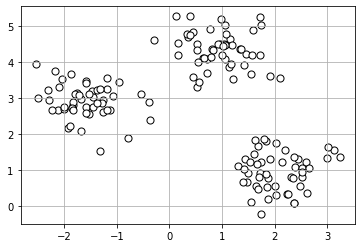

In [6]:
plt.scatter(X[:,0], X[:, 1], c='white', marker='o', edgecolors='black', s=50)
plt.grid()
plt.show()

## Aplicando K-Means ao dataset acima

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=3, 
                init='random',
                n_init=10,
                max_iter=300,
                tol=1e-04, 
                random_state=0)

### Explicação dos parâmetros usados no modelo acima
* n_clusters: número de clusters usados a priori;
* n_init: número de vezes que rodamos o algoritmo/modelo independentemente com diferentes centroids de modo a retornar o centroid com o menor erro possível (menor *SSE*);
* max_iter: número máximo de iterações para cada modelo rodado;
* tol: tolerância para o erro;
  - Este parâmetro ajuda a lidar com a convergência do modelo de modo a minimizar o custo computacional;

In [9]:
# fit e predict: aplica o modelo aos dados e retorna os respectivos clusters
y_kmeans = kmeans.fit_predict(X)

#### A saber
Quando aplicamos o k-means a dados do mundo real usando a métrica Euclidiana precisamos garantir que as nossas features estejam na mesma escala, para tal aplicamos a normalização *z-score* ou *min-max* se necessário.

In [10]:
y_kmeans

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [11]:
y_kmeans == 0

array([False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
        True, False, False,  True, False,  True,  True, False, False,
       False, False,

In [12]:
X[y_kmeans == 0, 0]

array([ 0.5323772 ,  0.802314  ,  0.5285368 ,  1.59141542,  1.74265969,
        1.72039618,  0.72144399,  0.16117091,  0.64003985,  1.13280393,
        1.04829186,  1.2091013 ,  0.3498724 ,  0.65910903,  1.15445328,
        0.34102758,  2.11114739,  1.45131429,  0.44089377,  1.08040757,
        0.72086751,  1.34081536,  1.06498315,  1.03972612, -0.30022483,
        0.12313498,  1.54597042,  0.38970838,  0.82049381,  1.56565986,
        0.96217896,  0.4519936 ,  1.19820169,  0.99914934,  0.77468161,
        1.91784543,  1.05374379,  1.72330962,  0.92466065,  0.39369516,
        0.78260667,  0.98152009,  1.00952869,  1.40848818,  0.5408715 ,
        0.5226209 ,  0.16932115,  0.56969694,  1.35678894,  1.1774409 ])

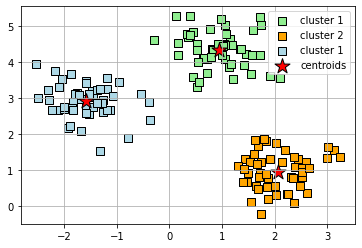

In [13]:
plt.scatter(X[y_kmeans == 0, 0], 
            X[y_kmeans == 0, 1], 
            s=50, c="lightgreen",
            marker="s", edgecolor="black",
            label="cluster 1")

plt.scatter(X[y_kmeans == 1, 0], 
            X[y_kmeans == 1, 1], 
            s=50, c="orange",
            marker="s", edgecolor="black",
            label="cluster 2")

plt.scatter(X[y_kmeans == 2, 0], 
            X[y_kmeans == 2, 1], 
            s=50, c="lightblue",
            marker="s", edgecolor="black",
            label="cluster 1")

# clusters centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()